In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

tsv_path = "./gene_embedding_analysis/totalGenePairs_Corr_PosOrNeg.tsv"
df = pd.read_csv(tsv_path, delimiter="\t", header=None)
df.columns = ["Genes", "Corr", "Labels"]

In [11]:
# No NaNs present
df.dropna()

,Genes,Corr,Labels
0,"('ENSG00000006659', 'ENSG00000136487')",0.890005,0
1,"('ENSG00000061987', 'ENSG00000116984')",0.862437,0
2,"('ENSG00000002016', 'ENSG00000227124')",0.855477,1
3,"('ENSG00000031003', 'ENSG00000116984')",0.851554,0
4,"('ENSG00000036549', 'ENSG00000116984')",0.848659,1
...,...,...,...
73189,"('ENSG00000064651', 'ENSG00000174970')",-0.649238,1
73190,"('ENSG00000008988', 'ENSG00000177103')",-0.650591,0
73191,"('ENSG00000006116', 'ENSG00000136487')",-0.657840,1
73192,"('ENSG00000064651', 'ENSG00000183862')",-0.666323,1


In [25]:
def plot_ROC_or_PR(tsv_path, metric_type='ROC'):

  def plot_curve(axis_1, axis_2, metric_type, plot_config = None):

    if metric_type == "ROC":
      config = {
          "legend_text": "ROC curve",
          "color": "blue",
          "xlab": "False Positive Rate",
          "ylab": "True Positive Rate",
          "title": "Receiver Operating Characteristic (ROC) Curve",
          "legend_location": "lower right"
      }

    elif metric_type == "PR":
      config = {
          "legend_text": "PR curve",
          "color": "darkorange",
          "xlab": "Recall",
          "ylab": "Precision",
          "title": "Precision-Recall Curve",
          "legend_location": "lower left"
      }

    # option to include your own config dict
    if plot_config != None:
      config = plot_config

    area_under_curve = auc(axis_1, axis_2)
    plt.figure(figsize=(8, 6))
    legnd = config['legend_text']
    plt.plot(axis_1, axis_2, color=config['color'], lw=2, label=f'{legnd} (AUC = {area_under_curve:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(config['xlab'])
    plt.ylabel(config['ylab'])
    plt.title(config['title'])
    plt.legend(loc=config["legend_location"])
    plt.grid()
    plt.show()

  df = pd.read_csv(tsv_path, delimiter="\t", header=None)
  df.columns = ["Genes", "Corr", "Labels"]
  # tested with different random samples of the data, with smaller n the auroc values are much more variable per sample
#  df = df.sample(n=1000)

  y = df["Labels"].to_numpy()
  scores = df["Corr"].to_numpy()

  if metric_type == "ROC":
    fpr, tpr, _ = roc_curve(y, scores)
    plot_curve(fpr, tpr, metric_type = metric_type)
  elif metric_type == "PR":
    precision, recall, _ = precision_recall_curve(y, scores)
    plot_curve(recall, precision, metric_type = metric_type)


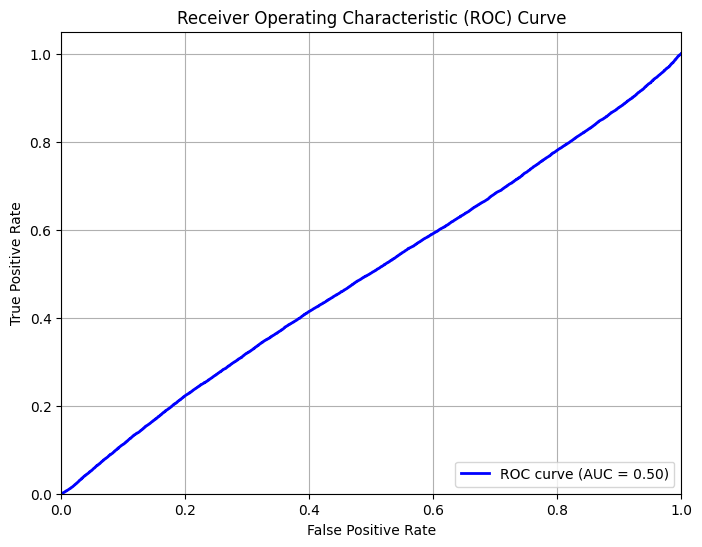

In [26]:
plot_ROC_or_PR(tsv_path)

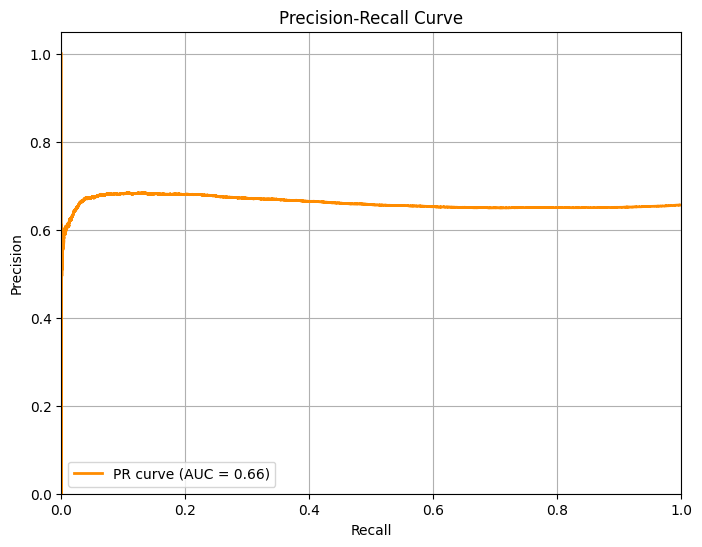

In [27]:
plot_ROC_or_PR(tsv_path, metric_type="PR")